In [1]:
import numpy as np
import random
import pandas as pd
import pylab as plt
import seaborn as sns

from sparse_matrix_compression import relative_index_coding, relative_index_decoding, \
    gen_random_sparse_array, bits_for_storage

RANDOM_SEED = 24
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
trials = 1000
test_size = 100
test_rate = 0.5
test_maximal_int = 7

for idx in range(trials):
    test_array = gen_random_sparse_array(size=test_size, rate=test_rate)
    v, d, s = relative_index_coding(test_array, maximal_int=test_maximal_int)
    decoded_array = relative_index_decoding(v, d, s, target_len=test_size, maximal_int=test_maximal_int)
    assert np.array_equal(test_array, decoded_array)

In [4]:
bits_per_element = 6
maximal_diff_int = 2 ** bits_per_element - 1
test_size = 1000
test_rate = 0.9

compression_rates = []

for idx in range(trials):
    bits_needed = bits_for_storage(
        gen_random_sparse_array(test_size, rate=test_rate),
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    compression_rates.append(bits_needed / test_size) # relative to bitmask

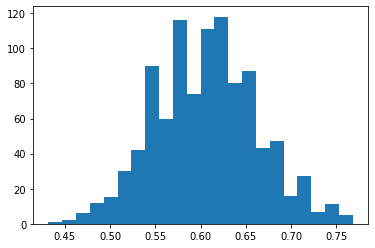

In [5]:
plt.hist(compression_rates, bins='auto');

In [40]:
compression_rates = {'rate': [], 'max_bits': []}
test_size = 1000
test_rate = 0.9

for bits_per_element in range(1, 15):
    maximal_diff_int = 2 ** bits_per_element - 1
    for idx in range(trials):
        bits_needed = bits_for_storage(
            gen_random_sparse_array(test_size, rate=test_rate),
            maximal_diff_int,
            bits_per_element,
            inverse_coding=False,
        )
        compression_rates['max_bits'].append(bits_per_element)
        compression_rates['rate'].append(bits_needed / test_size) # relative to bitmask

<AxesSubplot:xlabel='max_bits', ylabel='rate'>

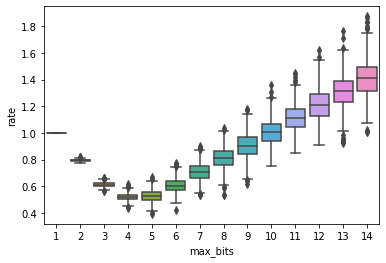

In [41]:
sns.boxplot(x='max_bits', y='rate', data=pd.DataFrame(compression_rates))

can compression be better at max_bits=4 than 5 for some matrices or vice versa?

In [44]:
compression_rates = {'rate': [], 'max_bits': []}
test_size = 1000
test_rate = 0.9

diff = []
    
for idx in range(trials):
    array = gen_random_sparse_array(test_size, rate=test_rate)
    bits_per_element = 4
    maximal_diff_int = 2 ** bits_per_element - 1
    bits_needed_4 = bits_for_storage(
        array,
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    bits_per_element = 5
    maximal_diff_int = 2 ** bits_per_element - 1
    bits_needed_5 = bits_for_storage(
        array,
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    diff.append((bits_needed_4 - bits_needed_5) / test_size) # relative to bitmask

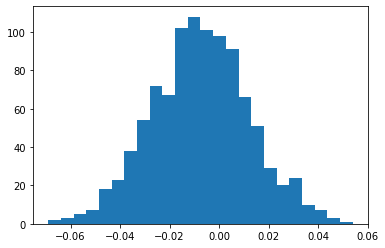

In [45]:
plt.hist(diff, bins='auto');

so it can be better to do encoding with a different # max_bits depending on the matrix

In [60]:
compression_rates = {'rate': [], 'max_bits': []}
test_size = 1000
test_rate = 0.9

rates = {'rate': [], 'tag': []}

for idx in range(trials):
    array = gen_random_sparse_array(test_size, rate=test_rate)
    bits_per_element = 4
    maximal_diff_int = 2 ** bits_per_element - 1
    bits_needed_4 = bits_for_storage(
        array,
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    bits_per_element = 5
    maximal_diff_int = 2 ** bits_per_element - 1
    bits_needed_5 = bits_for_storage(
        array,
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    rates['rate'].append(bits_needed_4 / test_size)
    rates['tag'].append('bits4')
    rates['rate'].append(bits_needed_5 / test_size)
    rates['tag'].append('bits5')
    rates['rate'].append((min(bits_needed_4, bits_needed_5) + 1) / test_size)
    rates['tag'].append('betterone')
    

<AxesSubplot:xlabel='tag', ylabel='rate'>

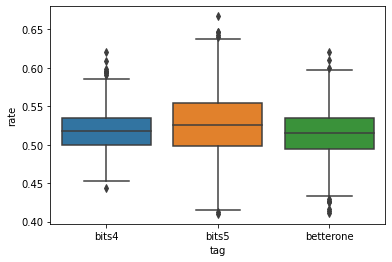

In [61]:
sns.boxplot(x='tag', y='rate', data=pd.DataFrame(rates))

In [74]:
compression_rates = {'rate': [], 'max_bits': []}
test_size = 1000
test_rate = 0.95

for bits_per_element in range(1, 10):
    maximal_diff_int = 2 ** bits_per_element - 1
    for idx in range(trials):
        bits_needed = bits_for_storage(
            gen_random_sparse_array(test_size, rate=test_rate),
            maximal_diff_int,
            bits_per_element,
            inverse_coding=False,
        )
        compression_rates['max_bits'].append(bits_per_element)
        compression_rates['rate'].append(bits_needed / test_size) # relative to bitmask

<AxesSubplot:xlabel='max_bits', ylabel='rate'>

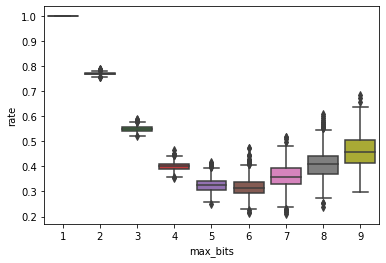

In [73]:
sns.boxplot(x='max_bits', y='rate', data=pd.DataFrame(compression_rates))

In [36]:
bits_per_element = 2
maximal_diff_int = 2 ** bits_per_element - 1
test_size = 1000
test_rate = 0.9
test_interval = 4

compression_rates = []

for idx in range(trials):
    array = gen_random_sparse_array(test_size, rate=test_rate)
    bits_needed = 0
    for interval_index in range(int(array.shape[0] / test_interval)):
        bits_needed += bits_for_storage(
            array[interval_index * test_interval : (interval_index + 1) * test_interval],
            maximal_diff_int,
            bits_per_element,
        )
    compression_rates.append(bits_needed / test_size) # relative to bitmask

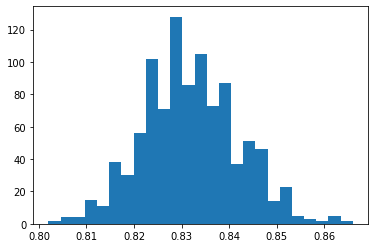

In [37]:
plt.hist(compression_rates, bins='auto');

In [86]:
test_size = 1000
test_rate = 0.95
bits_per_element = 4
compression_rates = {'rate': [], 'interval': []}

for test_interval in [2, 4, 10, 50, 100, 200, 500, 1000]:
    maximal_diff_int = 2 ** bits_per_element - 1
    
    for idx in range(trials):
        array = gen_random_sparse_array(test_size, rate=test_rate)
        bits_needed = 0
        for interval_index in range(int(array.shape[0] / test_interval)):
            bits_needed += bits_for_storage(
                array[interval_index * test_interval : (interval_index + 1) * test_interval],
                maximal_diff_int,
                bits_per_element,
            )
        compression_rates['interval'].append(test_interval)
        compression_rates['rate'].append(bits_needed / test_size) # relative to bitmask

<AxesSubplot:xlabel='interval', ylabel='rate'>

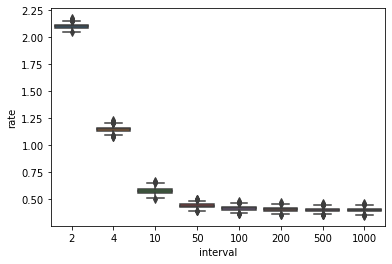

In [87]:
sns.boxplot(x='interval', y='rate', data=pd.DataFrame(compression_rates))

In [98]:
test_size = 1000
test_rate = 0.95
test_interval = 5
compression_rates = {'rate': [], 'max_bits': []}

for bits_per_element in range(1, 10):
    maximal_diff_int = 2 ** bits_per_element - 1
    
    for idx in range(trials):
        array = gen_random_sparse_array(test_size, rate=test_rate)
        bits_needed = 0
        for interval_index in range(int(array.shape[0] / test_interval)):
            bits_needed += 1
            array_slice = array[interval_index * test_interval : (interval_index + 1) * test_interval]
            if all(value == 0 for value in array_slice):
                continue
            else:
                bits_needed += bits_for_storage(
                    array_slice,
                    maximal_diff_int,
                    bits_per_element,
                )
        compression_rates['max_bits'].append(bits_per_element)
        compression_rates['rate'].append(bits_needed / test_size) # relative to bitmask

<AxesSubplot:xlabel='max_bits', ylabel='rate'>

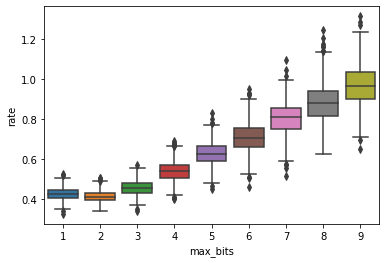

In [99]:
sns.boxplot(x='max_bits', y='rate', data=pd.DataFrame(compression_rates))

In [106]:
test_size = 1000
test_rate = 0.95
bits_per_element = 2
compression_rates = {'rate': [], 'interval': []}

for test_interval in [2, 4, 10, 50, 100, 200, 500, 1000]:
    maximal_diff_int = 2 ** bits_per_element - 1
    
    for idx in range(trials):
        array = gen_random_sparse_array(test_size, rate=test_rate)
        bits_needed = 0
        for interval_index in range(int(array.shape[0] / test_interval)):
            bits_needed += 1
            array_slice = array[interval_index * test_interval : (interval_index + 1) * test_interval]
            if all(value == 0 for value in array_slice):
                continue
            else:
                bits_needed += bits_for_storage(
                    array_slice,
                    maximal_diff_int,
                    bits_per_element,
                )
        compression_rates['interval'].append(test_interval)
        compression_rates['rate'].append(bits_needed / test_size) # relative to bitmask

<AxesSubplot:xlabel='interval', ylabel='rate'>

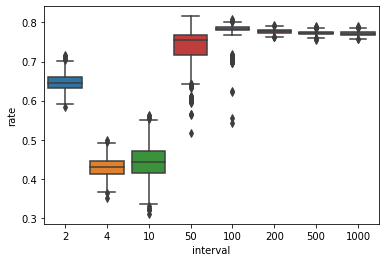

In [107]:
sns.boxplot(x='interval', y='rate', data=pd.DataFrame(compression_rates))

In [55]:
bits_per_element = 2
maximal_diff_int = 2 ** bits_per_element - 1

array = gen_random_sparse_array(1000, rate=0.5)
num_bits = 0
interval = 8
for interval_index in range(int(array.shape[0] / interval)):
    sub_interval = array[
        interval_index * interval : (interval_index + 1) * interval
    ]
    if np.mean(sub_interval) <= 0.5:
        # if interval_index % 2 == 0:
        b = bits_for_storage(sub_interval, maximal_diff_int, bits_per_element)
    else:
        b = bits_for_storage(
            sub_interval, maximal_diff_int, bits_per_element, inverse_coding=True
        )
        # b += 1
    num_bits += b

print(num_bits)

1024


In [56]:
bits_per_element = 1
maximal_diff_int = 2 ** bits_per_element - 1
array = gen_random_sparse_array(1000, rate=0.5)
val, diff, sign = relative_index_coding(array, maximal_int=maximal_diff_int)
bits_per_element * diff.shape[0] + sign.shape[0]

print(np.mean(diff))
print(diff.shape)
print(sign.shape)

0.5082956259426847
(663,)
(337,)


In [57]:
bits_per_element = 1
maximal_diff_int = 2 ** bits_per_element - 1
array = gen_random_sparse_array(1000, rate=0.5)

interval = 4
full_diff = []
full_sign = []

for interval_index in range(int(array.shape[0] / interval)):
    sub_interval = array[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff, val, sign = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff += list(diff)
    full_sign += list(sign)

full_diff = np.array(full_diff)
full_sign = np.array(full_sign)

print(len(full_diff) + len(full_sign))
print(full_diff.shape[0])
full_diff = np.array([0 if val > 0 else 1 for val in full_diff])
print(1 - np.mean(full_diff))

783
515
1.0


In [58]:
interval = 4
full_diff2 = []
full_sign2 = []
for interval_index in range(int(full_diff.shape[0] / interval)):
    sub_interval = full_diff[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff2, val, sign2 = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff2 += list(diff2)
    full_sign2 += list(sign2)

full_diff2 = np.array(full_diff2)
full_sign2 = np.array(full_sign2)

print(len(full_diff2) + len(full_sign2))
print(full_sign.shape[0])
print(1 - np.mean(full_sign))


256
268
0.5111940298507462


In [59]:
interval = 4
full_diff3 = []
full_sign3 = []
for interval_index in range(int(full_sign.shape[0] / interval)):
    sub_interval = full_sign[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff3, val, sign3 = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff3 += list(diff3)
    full_sign3 += list(sign3)

full_diff3 = np.array(full_diff3)
full_sign3 = np.array(full_sign3)

print(len(full_diff3) + len(full_sign3))

210
